## Dataset Features

Selected Attributes (also found [here](/https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)):

1. **id** - ignore this for feature selection
2. **diagnosis** - M = malignant, B = benign
3. **radius** - distances from center to points on the perimeter
4. **texture** -  gray-scale values
5. **perimeter** - size of the core tumor
6. **area** - size of the core tumor
7. **smoothness** - local variation in radius lengths
8. **compactness** - perimeter^2 / area - 1.0
9. **concavity** -  of concave portions of the contour
11. **fractal_dimension** -  "coastline approximation"
12. **radius** - distances from center to points on the perimeter
13. **texture** - gray-scale values

Statistical Categories

1. **Mean**
2. **Worst**
3. **SE** - Standard Error (spread of measurements)

## Setup

In [0]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

**Import data **

1. Download the and extract the breast cancer dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 
2. upload *data.csv* to colab

In [8]:
from google.colab import files # google colab library for uploading datasets
uploaded = files.upload() # opens prompt to upload provided dataset

for fn in uploaded.keys(): # display statistics on uploaded file
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

## Preprocess Data 

Make sure you have uploaded the dataset before this step.

In [9]:
data = pd.read_csv("data.csv",header=0) # load data from row 0

FileNotFoundError: ignored

In [0]:
data.info() # show information on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non



** Drop The ID column and column(s) with null values** (Q1)

In [0]:
# data.drop("",axis=1,inplace=True)
# data.drop("",axis=1,inplace=True)

ValueError: ignored

In [0]:
# check to see if columns have been dropped
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Categorize the columns into the three separate statistical categories** (mean, standard error, worst)

hint: [python slice](https://stackoverflow.com/questions/509211/understanding-pythons-slice-notation)

In [0]:
# Divide features into statistical categories for easy processing
# features_mean= list(data.columns[])
# features_se= list(data.columns[])
# features_worst= list(data.columns[])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [0]:
# map diagnostic column to integers for easy analysis
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## Data Exploration & Feature Analysis

In [0]:
data.describe() # shows statistics on each feature

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


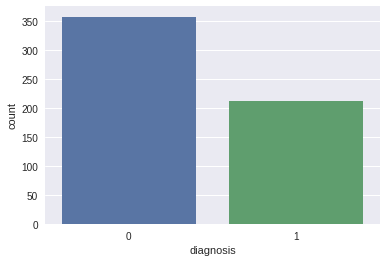

In [0]:
# show frequency of cancer stages (Q2)
sns.countplot(data['diagnosis'],label="Count")

**We can graph visually to find correlations between features**

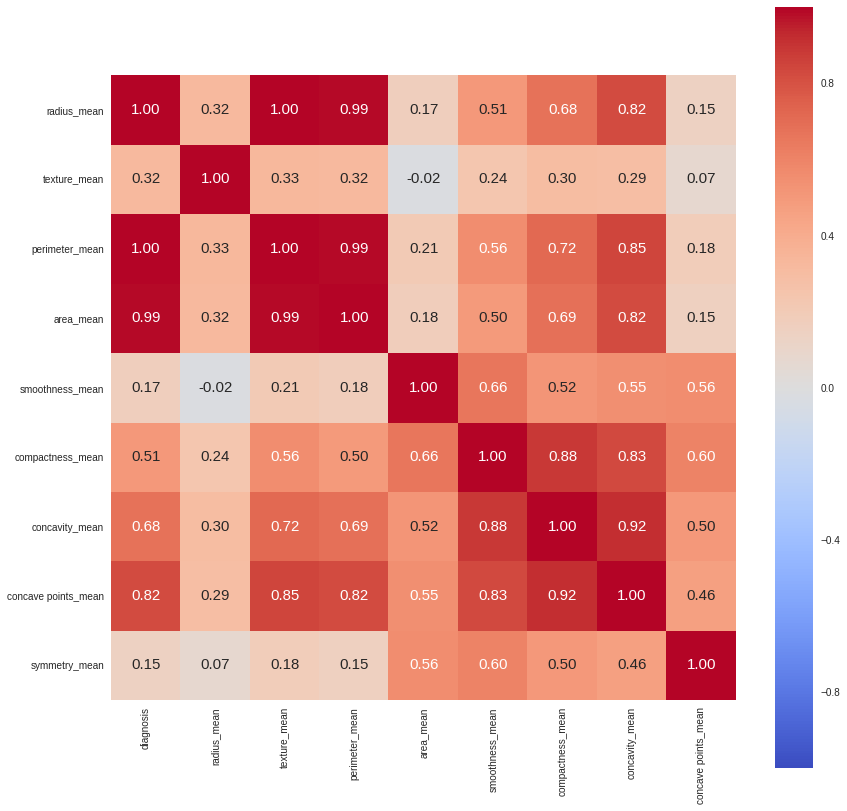

In [0]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

**observation**

 - the radius, parameter and area  are highly correlated as expected from their mathematical relationship*
    so from these we will use **any one** of them *
 - *compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use **compactness_mean** from here *
 - so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

** Try it yourself with features_worst!**

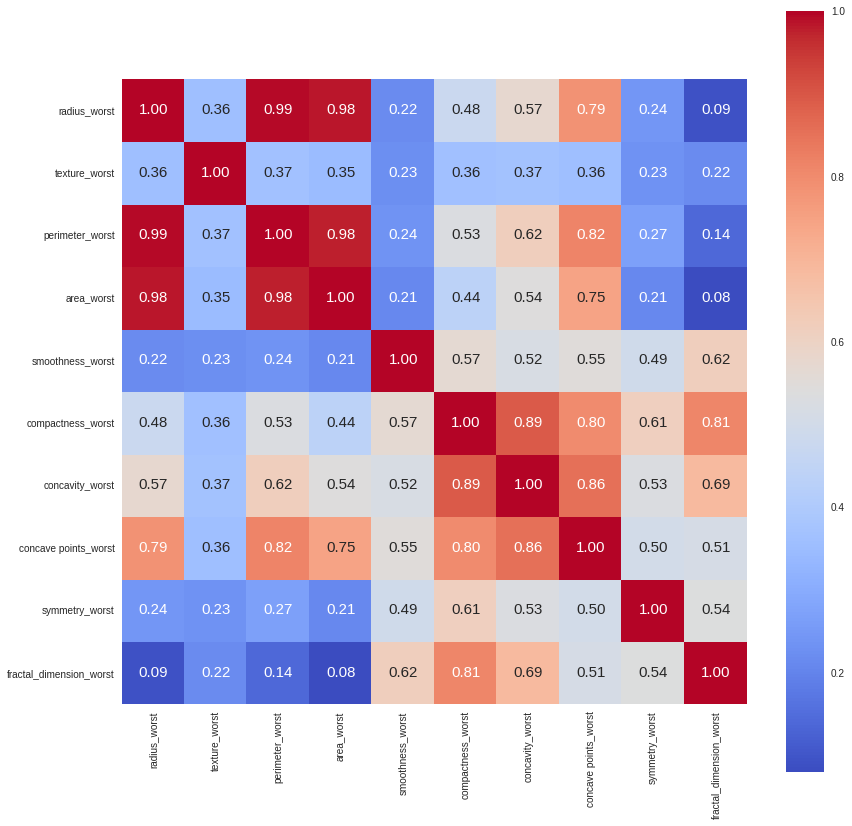

In [0]:
# Your Code Here

**Notice any changes?** (Q3)

##Training & Analyzing Models

We will look at Random Forests for this codelab. The main focus is on feature selection.

**Setup**

In [0]:
# a subset of all the features
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [0]:
train, test = train_test_split(data, test_size = 0.3) # split main dataset into train and test
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [0]:
train_X = train[prediction_var] # training data input 
train_y=train.diagnosis # labeled classifications

test_X= test[prediction_var]
test_y =test.diagnosis # classification output

**Random Forest Classifier**

We will start with training a random forest classifier on the subset of 5 features 
[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [0]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [0]:
model.fit(train_X,train_y)# train the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [0]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9122807017543859

*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

In [0]:
# taking all features
# prediction_var =

In [0]:
# setup training/testing data
# train_X = 
# train_y = 
# test_X = 
# test_y =

In [0]:
model=RandomForestClassifier(n_estimators=100)

In [0]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9181286549707602

**Did Accuracy increase? Occam's razor principle is it worth it?**

In [0]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

concave points_mean       0.261980
perimeter_mean            0.188511
area_mean                 0.161121
radius_mean               0.125708
concavity_mean            0.094745
texture_mean              0.064154
compactness_mean          0.043932
smoothness_mean           0.027619
fractal_dimension_mean    0.016216
symmetry_mean             0.016015
dtype: float64


**Reset**

In [0]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [0]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [0]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9122807017543859

**Features Worst**

In [0]:
prediction_var = features_worst

In [0]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [0]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9766081871345029

In [0]:
# the accuracy for RandomForest invcrease it means the value are more catogrical in Worst part
#lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

perimeter_worst            0.257460
concave points_worst       0.210518
radius_worst               0.149832
area_worst                 0.146340
concavity_worst            0.079780
texture_worst              0.045137
symmetry_worst             0.035592
compactness_worst          0.030919
smoothness_worst           0.028272
fractal_dimension_worst    0.016150
dtype: float64


In [0]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 5 important features

In [0]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [0]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [0]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

In [0]:
# So predicton features will be 
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [0]:
# So predicton features will be 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

## Cross Validation

Cross validation rotates training data to test the effectiveness of a model. It is important to check these to make sure your model generalizes to future data.

**Setup**

We have completed this step for you.

In [0]:
# Now with these variable we will try to explore a liitle bit we will move to how to use cross validiation
# for a detail on cross validation use this link https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

In [0]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds
    

In [0]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [0]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    
    

**Comparison of different classifiers**



In [0]:
# Decision Trees
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.719%
Cross-Validation Score : 89.474%
Cross-Validation Score : 90.351%
Cross-Validation Score : 90.511%


**Are we underfitting/overfitting here? What shows you?** (Q6)

*   List item
*   List item



In [0]:
# Support Vector Machines
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.661%
Cross-Validation Score : 56.140%
Cross-Validation Score : 65.789%
Cross-Validation Score : 69.883%
Cross-Validation Score : 72.807%
Cross-Validation Score : 74.706%


**Note: **The default SVM kernel have low cross-validation scores. We can raise these by trying other kernels and tuning the parameters.

In [0]:
# K Nearest Neighbors
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 90.510%
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.623%
Cross-Validation Score : 86.820%


In [0]:
# Random Forests
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 87.281%
Cross-Validation Score : 89.766%
Cross-Validation Score : 91.009%
Cross-Validation Score : 91.391%


In [0]:
# Logistic Regression
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


**Are we underfitting/overfitting here? What shows you?** (Q7)

## Analysis (Graded Portion)


**Questions:**

1. Why did we drop ID and null columns?
2. How many samples were tagged as malignant? (nearest 10th)
3. Did you notice any patterns between the feature_mean correlation and feature_worst correlation? What changed?
4. How many data points are we using for training the data? (exact number) How many were used for testing? (exact number)
5. Did accuracy increase which model is better based on Occam's Razor?
6. Are we overfitting/underfitting the decision tree model? Why? (hint: look for accuracy and cross  validation scores)
7. Are we overfitting/underfitting a logistic regression model? Do we have High or Low Bias and Variance?

**Write your questions below:**

1. blank
2. blank
3. blank
4. blank
5. blank
6. blank

## Citation

Inspiration taken from https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer (v25)
